In [ ]:
import matplotlib as mpl
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Activation
import import_ipynb
import libs
import seaborn as sns
from pandas.plotting import scatter_matrix
n_steps_in=7*24
n_steps_out=24
n_step=7*24

fnames=pd.read_table('data/names_72.txt',header=None)
fnames=fnames.values[:,0]
fnames= [fn.replace('json','csv') for fn in fnames]

#y data
data_hr1=[]
for fn in fnames:
    data_hr1.append(pd.read_csv('data/cv_26/'+fn).values[:,0])
data_hr1=np.array(data_hr1)
data_hr1=np.concatenate((data_hr1,np.zeros((47,1))),axis=1)
print(data_hr1.shape,data_w.shape,data_sun.shape,data_a.shape)

#faltten
data_hr1=data_hr1.reshape((-1,1))#dataset1.flatten()[:,np.newaxis]#(1128, 1)
# Feature Scaling
sc1 = MinMaxScaler(feature_range = (0, 1))
data_hr_scaled1 = sc1.fit_transform(data_hr1)
data_hr_scaled1.shape,np.min(data_hr_scaled1),np.max(data_hr_scaled1)


#weather data
data_w=libs.get_weather()[:,:]
#sun data
data_sun=libs.get_sun()
#air data
data_a=libs.get_air()#10

#merge
#dataset_scaled1=np.concatenate((data_hr_scaled1,data_w,data_sun,data_a),axis=-1)
#dataset_scaled1=np.concatenate((data_hr_scaled1,data_w),axis=-1)#11
dataset_scaled1=np.concatenate((data_hr_scaled1,data_w,data_sun),axis=-1)

n_features=dataset_scaled1.shape[1]
#train / test split
n_train=24*47-24*14
n_test=len(dataset_scaled1)-n_train
training_set_scaled1=dataset_scaled1[:n_train]
test_set_scaled1=dataset_scaled1[n_train:]
print(training_set_scaled1.shape,test_set_scaled1.shape)

plt.rcParams["figure.figsize"] = (20,3)
for i in range(n_features):
    fig=plt.figure()
    fig.add_subplot(1,1,1).plot(dataset_scaled1[:,i],'darkblue')#hr,기온,고도,전운량,시정
plt.show()

In [19]:
fnames=pd.read_table('data/names_72.txt',header=None)
fnames=fnames.values[:,0]
fnames= [fn.replace('json','csv') for fn in fnames]
data_hr1=[]
for fn in fnames:
    data_hr1.append(pd.read_csv('data/cv_26/'+fn).values[:,0])
data_hr1=np.array(data_hr1)
data_hr1=np.concatenate((data_hr1,np.zeros((47,1))),axis=1)
#print(data_hr1.shape,data_w.shape,data_sun.shape,data_a.shape)

#faltten
data_hr1=data_hr1.reshape((-1,1))#dataset1.flatten()[:,np.newaxis]#(1128, 1)
data_hr1 = pd.DataFrame({'태양광': data_hr1[:,0]})
data_hr1.head()

,태양광
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [15]:
tmp=pd.read_csv('data/weather_c.csv')#.values[:,1:]#4
#tmp=tmp.iloc[0:,1:]
tmp.tail()

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),일조(hr),시정(10m),지면온도(°C),풍향(cos),풍향(sin)
1123,2019-10-06 19:00,17.3,0.0,0.7,75.0,12.8,1002.4,0.0,1675.0,17.9,-0.173648,0.984808
1124,2019-10-06 20:00,15.4,0.0,0.5,84.0,12.7,1002.7,0.0,1346.0,16.6,-0.984808,0.173648
1125,2019-10-06 21:00,14.5,0.0,0.1,91.0,13.0,1002.8,0.0,1198.0,16.0,1.000000,0.000000
1126,2019-10-06 22:00,13.9,0.0,0.5,95.0,13.1,1003.1,0.0,1092.0,16.1,0.573576,0.819152
1127,2019-10-06 23:00,14.0,0.0,0.2,96.0,13.3,1003.0,0.0,988.0,16.3,1.000000,0.000000


In [16]:
data_w=pd.read_csv('data/weather_c.csv')#.values[:,1:]#4
data_w=data_w.iloc[0:,1:]
data_w

,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),일조(hr),시정(10m),지면온도(°C),풍향(cos),풍향(sin)
0,21.5,0.0,0.2,99.0,21.3,991.2,0.0,229.0,23.1,1.000000e+00,0.000000
1,21.5,0.0,0.1,98.0,21.1,991.1,0.0,225.0,22.9,1.000000e+00,0.000000
2,21.1,0.0,0.4,99.0,20.9,990.8,0.0,179.0,22.2,1.000000e+00,0.000000
3,20.4,0.0,0.3,99.0,20.2,990.6,0.0,167.0,21.6,1.000000e+00,0.000000
4,20.2,0.0,0.0,99.0,20.0,990.9,0.0,179.0,21.2,1.000000e+00,0.000000
5,20.1,0.0,0.3,99.0,19.9,991.0,0.0,168.0,21.2,1.000000e+00,0.000000
6,19.8,0.0,0.3,99.0,19.6,990.8,0.0,156.0,21.2,1.000000e+00,0.000000
7,20.2,0.0,0.9,99.0,20.0,991.1,0.0,155.0,22.7,-8.191520e-01,0.573576
8,23.2,0.0,0.4,90.0,21.4,990.9,0.4,239.0,26.2,1.000000e+00,0.000000
9,26.0,0.0,0.8,78.0,21.8,990.9,0.7,509.0,34.2,5.735764e-01,0.819152


In [105]:
data_w=pd.read_csv('data/weather_c.csv')#.values[:,1:]#4
data_w.head()

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),일조(hr),시정(10m),지면온도(°C),풍향(cos),풍향(sin)
0,2019-08-20 00:00,21.5,0.0,0.2,99.0,21.3,991.2,0.0,229.0,23.1,1.0,0.0
1,2019-08-20 01:00,21.5,0.0,0.1,98.0,21.1,991.1,0.0,225.0,22.9,1.0,0.0
2,2019-08-20 02:00,21.1,0.0,0.4,99.0,20.9,990.8,0.0,179.0,22.2,1.0,0.0
3,2019-08-20 03:00,20.4,0.0,0.3,99.0,20.2,990.6,0.0,167.0,21.6,1.0,0.0
4,2019-08-20 04:00,20.2,0.0,0.0,99.0,20.0,990.9,0.0,179.0,21.2,1.0,0.0


In [106]:
data_w=data_w.iloc[0:,1:]
data_w.head()

,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),일조(hr),시정(10m),지면온도(°C),풍향(cos),풍향(sin)
0,21.5,0.0,0.2,99.0,21.3,991.2,0.0,229.0,23.1,1.0,0.0
1,21.5,0.0,0.1,98.0,21.1,991.1,0.0,225.0,22.9,1.0,0.0
2,21.1,0.0,0.4,99.0,20.9,990.8,0.0,179.0,22.2,1.0,0.0
3,20.4,0.0,0.3,99.0,20.2,990.6,0.0,167.0,21.6,1.0,0.0
4,20.2,0.0,0.0,99.0,20.0,990.9,0.0,179.0,21.2,1.0,0.0


In [43]:
data_w=pd.read_csv('data/weather_c.csv')#.values[:,1:]#4
data_w=data_w.iloc[0:,1:]
#data_w=np.delete(data_w, [4,6], axis=1)#5,7
#data_w=data_w.iloc[0:,[0,1,2,3,5,7,8,9,10,11]]
print(data_w.shape)

#wind=pd.DataFrame({'풍향(sin)': np.sin(np.pi*data_w["풍향(16방위)"]/360),'풍향(cos)': np.cos(np.pi*data_w["풍향(16방위)"]/360)})
#data_w=pd.concat((data_w,wind),axis=1)
#data_w=data_w.drop("풍향(16방위)",axis=1)
data_w.head()

(1128, 10)


,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),일조(hr),시정(10m),지면온도(°C),풍향
0,21.5,0.0,0.2,99.0,21.3,991.2,0.0,229.0,23.1,1.0
1,21.5,0.0,0.1,98.0,21.1,991.1,0.0,225.0,22.9,1.0
2,21.1,0.0,0.4,99.0,20.9,990.8,0.0,179.0,22.2,1.0
3,20.4,0.0,0.3,99.0,20.2,990.6,0.0,167.0,21.6,1.0
4,20.2,0.0,0.0,99.0,20.0,990.9,0.0,179.0,21.2,1.0


In [45]:
#al
data_al=[]
for fn in fnames:
    tmp=pd.read_csv('data/sun/UR00000126/'+fn[2:]).values[:,2]
    for i in range(24):
        tmpi=np.fromstring(tmp[i], dtype=float, sep=' ')
        tmp[i]=tmpi[0]+tmpi[1]/60.0+tmpi[2]/3600.0
    data_al.append(tmp)
data_al=np.array(data_al).reshape((-1,1))#dataset1.flatten()[:,np.newaxis]#(1128, 1)
data_al=data_al.astype('float32')
#data_al = pd.DataFrame({'고도_sin': np.pi*np.sin(data_al[:,0]/90),'고도_cos': np.cos(np.pi*data_al[:,0]/90)})
data_al = pd.DataFrame({'고도': np.cos(np.pi*data_al[:,0]/90)})
data_al.head()

,고도
0,0.161826
1,0.172333
2,0.248753
3,0.474512
4,0.763361


In [50]:
#az
data_az=[]
for fn in fnames:
    tmp=pd.read_csv('data/sun/UR00000126/'+fn[2:]).values[:,1]
    for i in range(24):
        tmpi=np.fromstring(tmp[i], dtype=float, sep=' ')
        tmp[i]=tmpi[0]+tmpi[1]/60.0+tmpi[2]/3600.0
    data_az.append(tmp)
data_az=np.array(data_az).reshape((-1,1))#dataset1.flatten()[:,np.newaxis]#(1128, 1)
data_az=data_az.astype('float32')
#data_az = pd.DataFrame({'방위각_sin': np.sin(np.pi*data_az[:,0]/360),'방위각_cos': np.cos(np.pi*data_az[:,0]/360)})
data_az = pd.DataFrame({'방위각': np.cos(np.pi*data_az[:,0]/360)})
#data_az = pd.DataFrame({'방위각': data_az[:,0]})
data_az.head()

,방위각
0,-0.995242
1,0.997259
2,0.972345
3,0.931521
4,0.885693


In [51]:
data_hr1.head()

,태양광
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [52]:
data=pd.concat((data_hr1,data_w,data_al,data_az),axis=1)
data.head()

,태양광,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),일조(hr),시정(10m),지면온도(°C),풍향,고도,방위각
0,0.0,21.5,0.0,0.2,99.0,21.3,991.2,0.0,229.0,23.1,1.0,0.161826,-0.995242
1,0.0,21.5,0.0,0.1,98.0,21.1,991.1,0.0,225.0,22.9,1.0,0.172333,0.997259
2,0.0,21.1,0.0,0.4,99.0,20.9,990.8,0.0,179.0,22.2,1.0,0.248753,0.972345
3,0.0,20.4,0.0,0.3,99.0,20.2,990.6,0.0,167.0,21.6,1.0,0.474512,0.931521
4,0.0,20.2,0.0,0.0,99.0,20.0,990.9,0.0,179.0,21.2,1.0,0.763361,0.885693


In [53]:
#data.고도=data.고도.astype('float64')
#data.방위각=data.방위각.astype('float64')
data.dtypes

태양광          float64
기온(°C)       float64
강수량(mm)      float64
풍속(m/s)      float64
습도(%)        float64
이슬점온도(°C)    float64
현지기압(hPa)    float64
일조(hr)       float64
시정(10m)      float64
지면온도(°C)     float64
풍향           float64
고도           float32
방위각          float32
dtype: object

'''fig=plt.figure(figsize=(20,6))
fig.add_subplot(3,1,1).plot(data.고도)
fig.add_subplot(3,1,2).plot(data.방위각)
fig.add_subplot(3,1,3).plot(data.태양광)
plt.show()
'''
plt.plot(data.방위각/100)
plt.plot(data.태양광/40000)
plt.show()

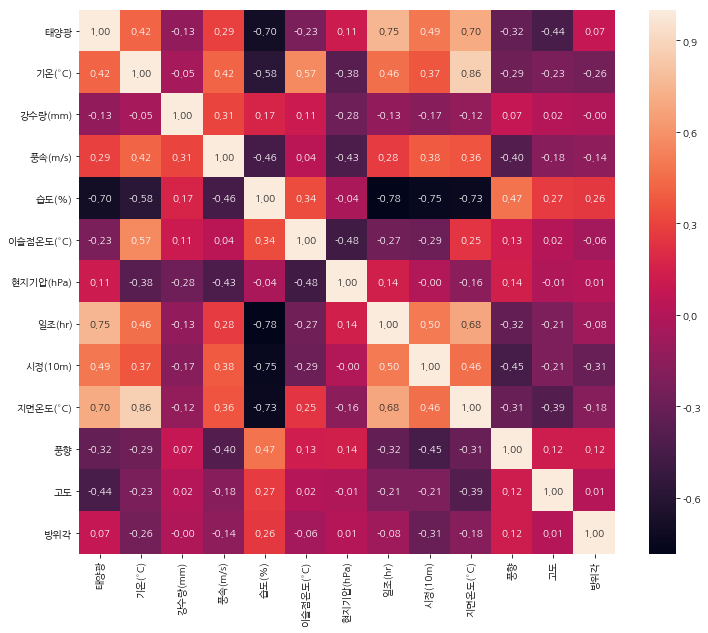

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
#plt.xticks(labels=np.array(range(13)))
plt.show()

In [101]:
array=data.corr().values[0,:]
print(array)
#print(np.argsort(-np.abs(array)))
idx=np.argsort(-np.abs(array))
print(data.columns[idx])
idx

[ 1.          0.41886931 -0.13277789  0.28546521 -0.69676062 -0.22557519
  0.11168564  0.75066112  0.49276768  0.70334952 -0.31640384 -0.43813908
  0.07443896]
Index(['태양광', '일조(hr)', '지면온도(°C)', '습도(%)', '시정(10m)', '고도', '기온(°C)', '풍향',
       '풍속(m/s)', '이슬점온도(°C)', '강수량(mm)', '현지기압(hPa)', '방위각'],
      dtype='object')


array([ 0,  7,  9,  4,  8, 11,  1, 10,  3,  5,  2,  6, 12])

In [114]:
np.sort(-np.abs(array))

array([-1.        , -0.75066112, -0.70334952, -0.69676062, -0.49276768,
       -0.43813908, -0.41886931, -0.31640384, -0.28546521, -0.22557519,
       -0.13277789, -0.11168564, -0.07443896])

In [99]:
data.columns

Index(['태양광', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '이슬점온도(°C)',
       '현지기압(hPa)', '일조(hr)', '시정(10m)', '지면온도(°C)', '풍향', '고도', '방위각'],
      dtype='object')

<Figure size 1080x1080 with 0 Axes>

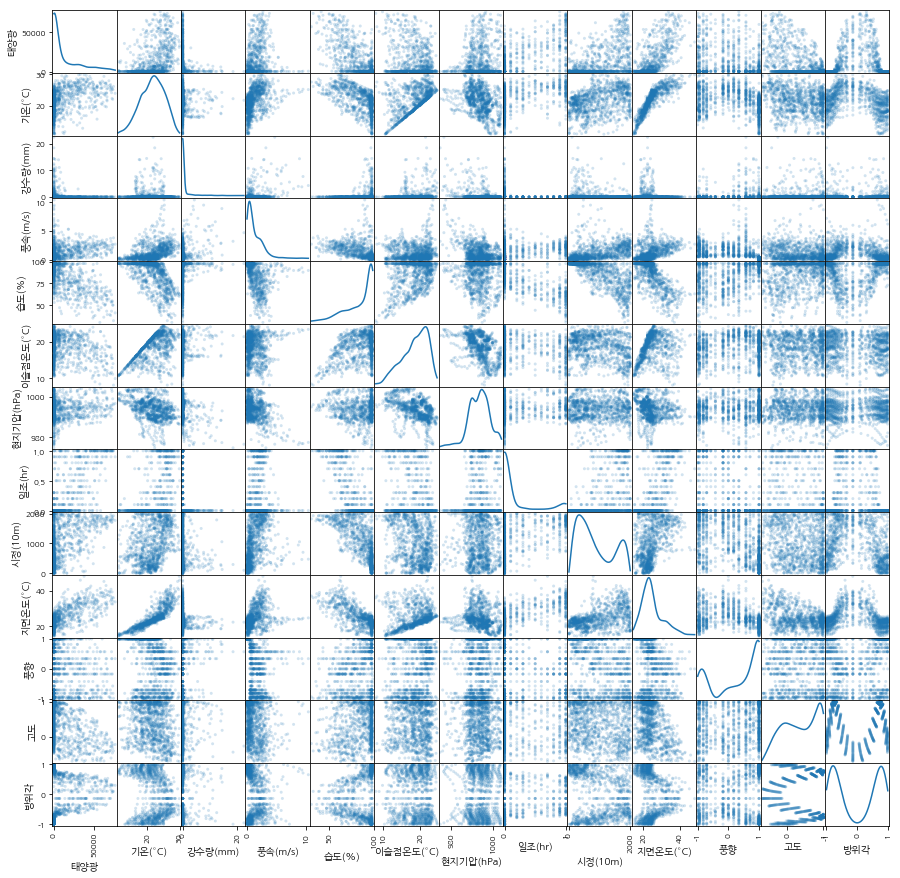

In [55]:
plt.figure(figsize=(15,15))
scatter_matrix(data, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

In [68]:
data.corr().iloc[:,:1].T.shape

(1, 13)

In [113]:
?scatter_matrix

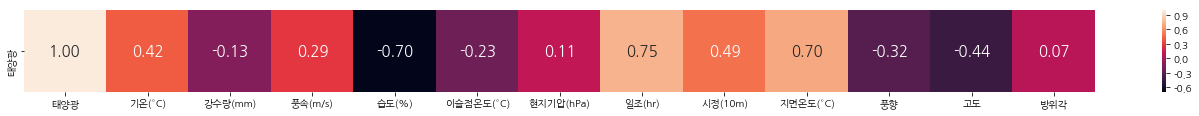

In [108]:
plt.figure(figsize=(24,1.5))
sns.heatmap(data.corr().iloc[:,:1].T, annot=True, fmt=".2f", annot_kws={"size": 15})
#plt.xticks(labels=np.array(range(13)))
plt.show()

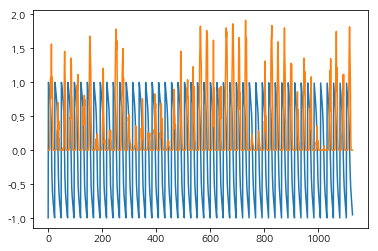

In [62]:
plt.plot(data['방위각'])#방위각#고도
plt.plot(data['태양광']/40000)
plt.show()

In [19]:
#import statsmodels.api as sm
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

X = data.iloc[:,1:] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = data.iloc[:,0]
 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X.astype(float)).fit()
#predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    태양광   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     350.9
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:11:40   Log-Likelihood:                -11859.
No. Observations:                1128   AIC:                         2.374e+04
Df Residuals:                    1117   BIC:                         2.379e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.398e+04   7.62e+04     -0.840      0.4

In [20]:
sc = MinMaxScaler(feature_range = (0, 1))
data_scaled=data
data_scaled.iloc[:,:] = sc.fit_transform(data)

/home/vislab/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:

X = data_scaled.iloc[:,1:] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = data_scaled.iloc[:,0]
 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X.astype(float)).fit()
#predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    태양광   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     350.9
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:11:43   Log-Likelihood:                 824.23
No. Observations:                1128   AIC:                            -1626.
Df Residuals:                    1117   BIC:                            -1571.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1768      0.141     -1.255      0.2

In [22]:
data_scaled

,태양광,기온(°C),풍속(m/s),풍향(16방위),습도(%),이슬점온도(°C),현지기압(hPa),일조(hr),시정(10m),지면온도(°C),고도
0,0.000000,0.552632,0.019231,0.000000,1.000000,0.804878,0.557432,0.0,0.112281,0.252976,0.147293
1,0.000000,0.552632,0.009615,0.000000,0.985507,0.792683,0.554054,0.0,0.110276,0.247024,0.149721
2,0.000000,0.531579,0.038462,0.000000,1.000000,0.780488,0.543919,0.0,0.087218,0.226190,0.167538
3,0.000000,0.494737,0.028846,0.000000,1.000000,0.737805,0.537162,0.0,0.081203,0.208333,0.222911
4,0.000000,0.484211,0.000000,0.000000,1.000000,0.725610,0.547297,0.0,0.087218,0.196429,0.308149
5,0.000000,0.478947,0.028846,0.000000,1.000000,0.719512,0.550676,0.0,0.081704,0.196429,0.382105
6,0.036649,0.463158,0.028846,0.000000,1.000000,0.701220,0.543919,0.0,0.075689,0.196429,0.471232
7,0.178010,0.484211,0.086538,0.805556,1.000000,0.725610,0.554054,0.0,0.075188,0.241071,0.567117
8,0.441099,0.642105,0.038462,0.000000,0.869565,0.810976,0.547297,0.4,0.117293,0.345238,0.664695
9,0.554974,0.789474,0.076923,0.305556,0.695652,0.835366,0.547297,0.7,0.252632,0.583333,0.761787


In [23]:
data

,태양광,기온(°C),풍속(m/s),풍향(16방위),습도(%),이슬점온도(°C),현지기압(hPa),일조(hr),시정(10m),지면온도(°C),고도
0,0.000000,0.552632,0.019231,0.000000,1.000000,0.804878,0.557432,0.0,0.112281,0.252976,0.147293
1,0.000000,0.552632,0.009615,0.000000,0.985507,0.792683,0.554054,0.0,0.110276,0.247024,0.149721
2,0.000000,0.531579,0.038462,0.000000,1.000000,0.780488,0.543919,0.0,0.087218,0.226190,0.167538
3,0.000000,0.494737,0.028846,0.000000,1.000000,0.737805,0.537162,0.0,0.081203,0.208333,0.222911
4,0.000000,0.484211,0.000000,0.000000,1.000000,0.725610,0.547297,0.0,0.087218,0.196429,0.308149
5,0.000000,0.478947,0.028846,0.000000,1.000000,0.719512,0.550676,0.0,0.081704,0.196429,0.382105
6,0.036649,0.463158,0.028846,0.000000,1.000000,0.701220,0.543919,0.0,0.075689,0.196429,0.471232
7,0.178010,0.484211,0.086538,0.805556,1.000000,0.725610,0.554054,0.0,0.075188,0.241071,0.567117
8,0.441099,0.642105,0.038462,0.000000,0.869565,0.810976,0.547297,0.4,0.117293,0.345238,0.664695
9,0.554974,0.789474,0.076923,0.305556,0.695652,0.835366,0.547297,0.7,0.252632,0.583333,0.761787


from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG
from keras.models import load_model
model=load_model('model/model8_2.h5')


SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    태양광   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     350.9
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:11:47   Log-Likelihood:                 824.23
No. Observations:                1128   AIC:                            -1626.
Df Residuals:                    1117   BIC:                            -1571.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1768      0.141     -1.255      0.210      -0.453       0.100
기온(°C)        -0.3266      0.193     -1.692      0.091      -0.705       0.052
풍속(m/s)        0.0710      0.037      1.919      0.055      -0.002       0.144
풍향(16방위)       0.0175      0.013      1.384      0.167      -0.007       0.042
습도(%)          0.2121      0.158      1.342      0.180      -0.098       0.522
이슬점온도(°C)     -0.2529      0.159     -1.593      0.111      -0.564       0.059
현지기압(hPa)      0.0174      0.028      0.628      0.530      -0.037       0.072
일조(hr)         0.2184      0.019     11.610      0.000       0.181       0.255
시정(10m)        0.0305      0.019      1.619      0.106      -0.006       0.067
지면온도(°C)       0.9774      0.061     16.100      0.000       0.858       1.097
고도             0.2467      0.017     14.523      0.000       0.213       0.280
==============================================================================
Omnibus:                      130.664   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.242
Skew:                           0.515   Prob(JB):                    1.16e-105
Kurtosis:                       6.036   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
data_w=pd.read_csv('data/weather_c.csv').values[:,1:]#4
data_w=np.delete(data_w, [4,6], axis=1)#5,7
data_w2_scaled=np.concatenate((data_w[24:],np.zeros((24,data_w.shape[1]))),axis=0)

w=np.concatenate((data_w,data_w2_scaled),axis=-1)

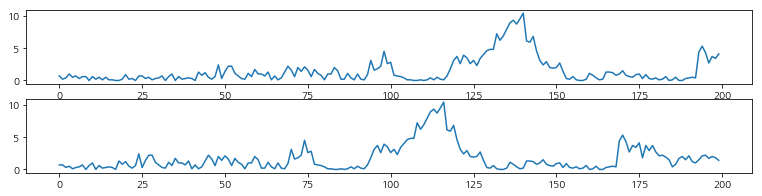

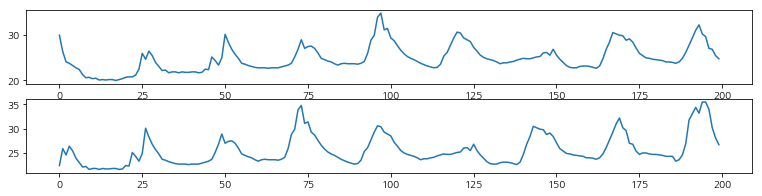

In [26]:
for i in range(w.shape[1]//2):
    if i!=1 and i!=6:
        continue
    fig=plt.figure(figsize=(13,3))
    fig.add_subplot(2,1,1).plot(w[300:500,i])
    fig.add_subplot(2,1,2).plot(w[300:500,i+w.shape[1]//2])
plt.show()

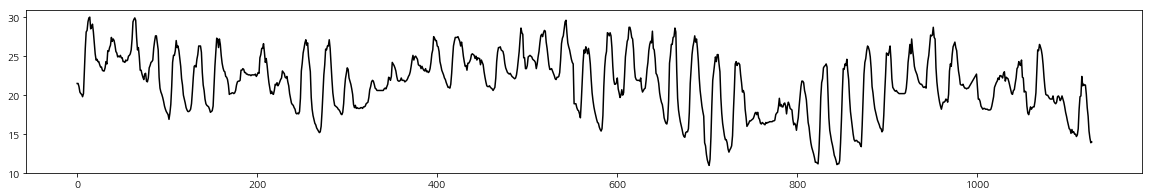

In [14]:
plt.plot(data_w[:,0],'k')
plt.show()

In [33]:
A=data_w[:,:1]#(1128, 1)
#A=A.ravel()[np.random.choice(A.size, c, replace=False)] = np.nan
np.put(A,np.random.choice(A.size, 20, replace=False),np.nan)

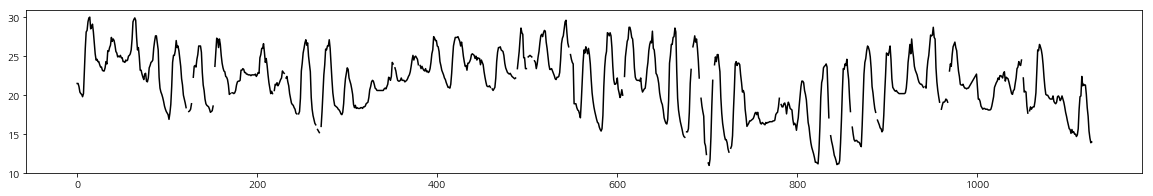

In [43]:
plt.plot(A,'k')
plt.savefig('tmp2.png')
plt.show()